In [117]:
import matplotlib.pyplot as plt
import numpy as np
import re, os, pickle
from collections import defaultdict
import pandas as pd

In [118]:
list_of_models = [item for item in os.listdir('run1/') if 'pkl' in item]

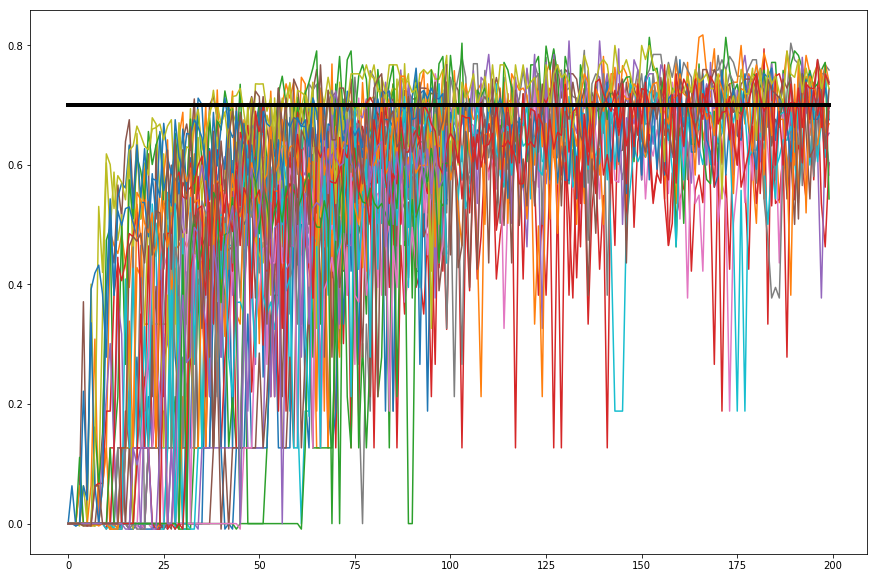

In [128]:
metrics = ['val_loss', 'val_mcc_k', 'loss', 'mcc_k']
projection_dict = {}

fig = plt.figure(figsize=(15, 10))

for model_ in list_of_models:
    with open('run1/' + model_, 'rb') as fp:
        model_data = pickle.load(fp)
        
        metric_dict = {'val_loss':[], 'val_mcc_k':[], 'loss':[], 'mcc_k':[]}

        for metric in metrics:
            for k,v in model_data['training'].items():
                metric_dict[metric] += v['results'][metric]
                
        plt.plot(metric_dict['val_mcc_k'])
plt.plot(np.zeros((200))+0.7, linewidth = 4, color = 'black')
plt.show()

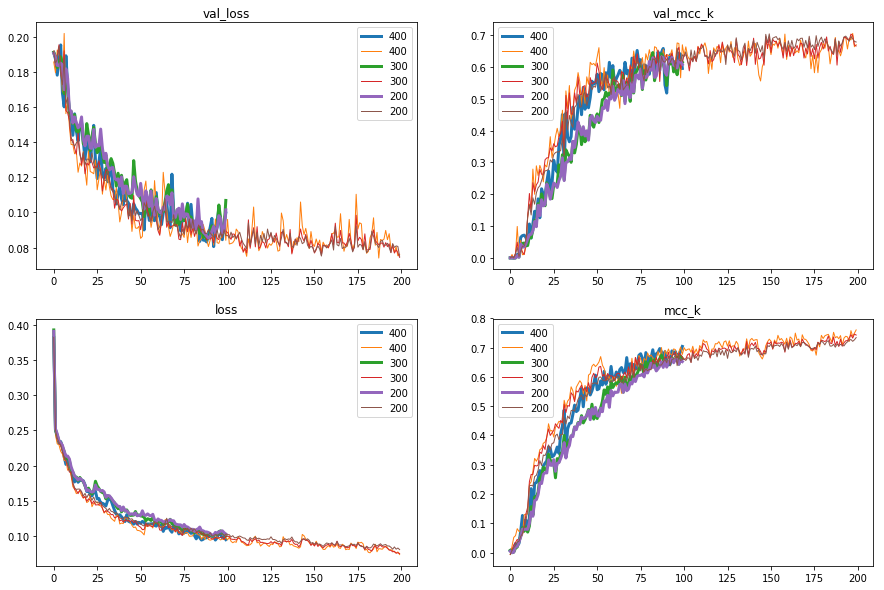

In [3]:

metrics = ['val_loss', 'val_mcc_k', 'loss', 'mcc_k']
projection_dict = {}


for model_ in list_of_models:
    with open('run1/' + model_, 'rb') as fp:
        model_data = pickle.load(fp)
        
        metric_dict = {'val_loss':[], 'val_mcc_k':[], 'loss':[], 'mcc_k':[]}

        for metric in metrics:
            for k,v in model_data['training'].items():
                metric_dict[metric] += v['results'][metric]
        
        projection_dict.setdefault(model_data['feature_config']['time_steps'], []).append(metric_dict)

fig = plt.figure(figsize=(15, 10))
for st_ in enumerate(metrics):   
    plt.subplot(2, 2, st_[0] + 1)
    qu1 = []
    qu2 = []
    for key in projection_dict.keys():
        for item in projection_dict[key]:
            if len(item[st_[1]]) == 100:
                qu1.append(item[st_[1]])
            else:
                qu2.append(item[st_[1]])
        thing1 = np.mean(np.squeeze(np.array(qu1)), axis = 0)
        thing2 = np.mean(np.squeeze(np.array(qu2)), axis = 0)
        plt.plot(thing1, label = key, linewidth = 3)
        plt.plot(thing2, label = key, linewidth = 1)
    plt.title(st_[1])
    plt.legend()

In [4]:
metrics = ['val_loss', 'val_mcc_k', 'loss', 'mcc_k']
projection_dict = {}


for model_ in list_of_models:
    with open('run1/' + model_, 'rb') as fp:
        model_data = pickle.load(fp)
        
        metric_dict = {'val_loss':[], 'val_mcc_k':[], 'loss':[], 'mcc_k':[]}

        for metric in metrics:
            for k,v in model_data['training'].items():
                metric_dict[metric] += v['results'][metric]
        

        projection_dict.setdefault(model_data['feature_config']['spectrogram_freq_bins']
                                       , []).append(metric_dict)
            

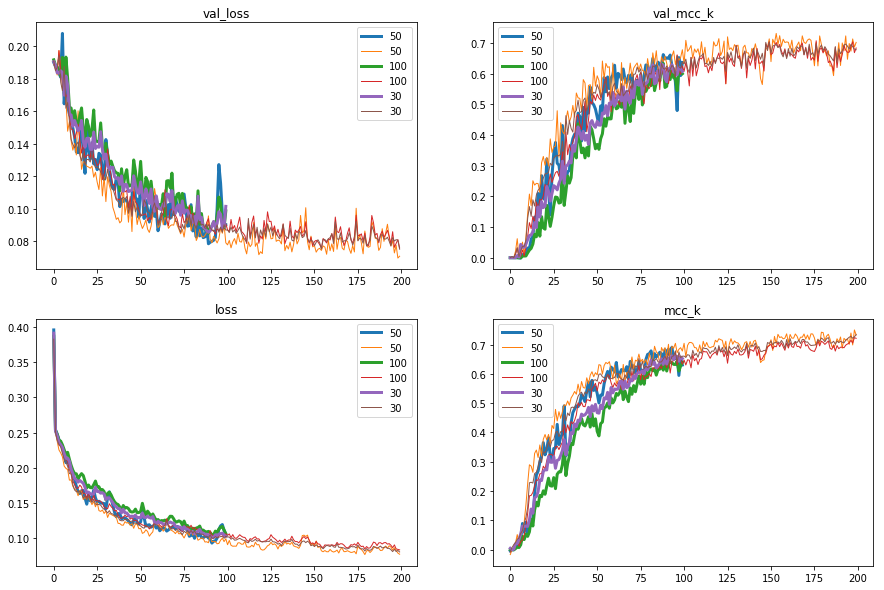

In [5]:
fig = plt.figure(figsize=(15, 10))
for st_ in enumerate(metrics):   
    plt.subplot(2, 2, st_[0] + 1)
    qu1 = []
    qu2 = []
    for key in projection_dict.keys():
        for item in projection_dict[key]:
            if len(item[st_[1]]) == 100:
                qu1.append(item[st_[1]])
            else:
                qu2.append(item[st_[1]])
        thing1 = np.mean(np.squeeze(np.array(qu1)), axis = 0)
        thing2 = np.mean(np.squeeze(np.array(qu2)), axis = 0)
        plt.plot(thing1, label = key, linewidth = 3)
        plt.plot(thing2, label = key, linewidth = 1)
    plt.title(st_[1])
    plt.legend()

In [6]:
metrics = ['val_loss', 'val_mcc_k', 'loss', 'mcc_k']
projection_dict = {}


for model_ in list_of_models:
    with open('run1/' + model_, 'rb') as fp:
        model_data = pickle.load(fp)
        
        metric_dict = {'val_loss':[], 'val_mcc_k':[], 'loss':[], 'mcc_k':[]}

        for metric in metrics:
            for k,v in model_data['training'].items():
                metric_dict[metric] += v['results'][metric]
        

        projection_dict.setdefault(len(model_data['train_config']['stages_desc']), []).append(metric_dict)




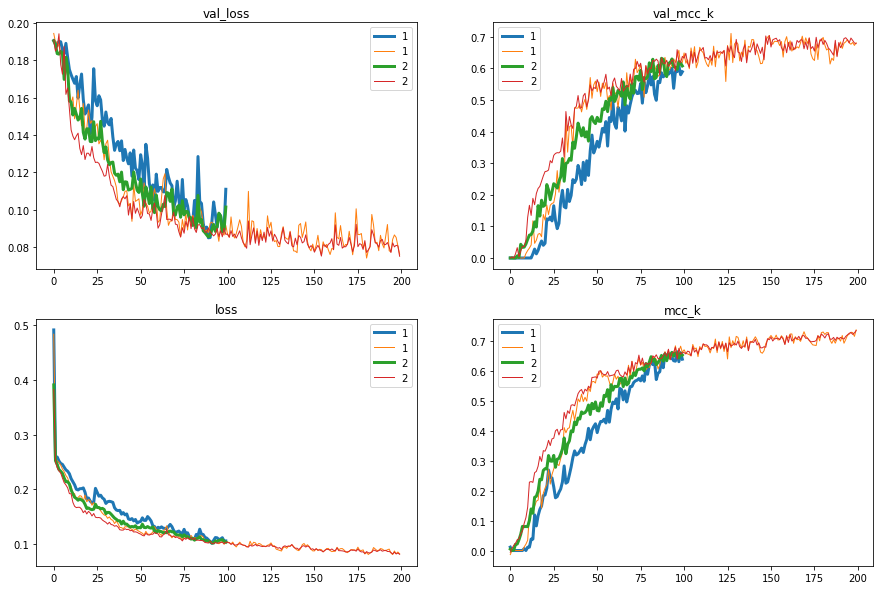

In [7]:
fig = plt.figure(figsize=(15, 10))
for st_ in enumerate(metrics):   
    plt.subplot(2, 2, st_[0] + 1)
    qu1 = []
    qu2 = []
    for key in projection_dict.keys():
        for item in projection_dict[key]:
            if len(item[st_[1]]) == 100:
                qu1.append(item[st_[1]])
            else:
                qu2.append(item[st_[1]])
        thing1 = np.mean(np.squeeze(np.array(qu1)), axis = 0)
        thing2 = np.mean(np.squeeze(np.array(qu2)), axis = 0)
        plt.plot(thing1, label = key, linewidth = 3)
        plt.plot(thing2, label = key, linewidth = 1)
    plt.title(st_[1])
    plt.legend()

# Evaluating submission for FEB7

models_v2/21907AM_hpt
models_v2/21907AQ_hpt


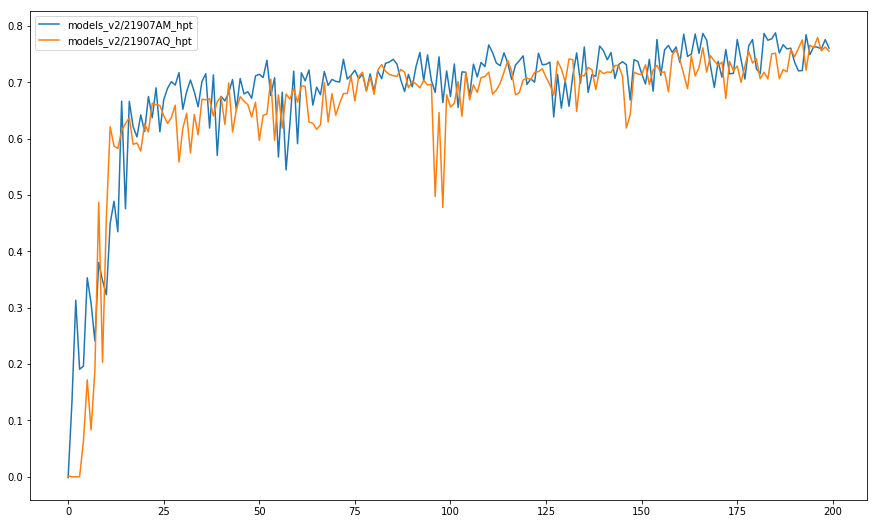

In [66]:
metrics = ['val_loss', 'val_mcc_k', 'loss', 'mcc_k']
projection_dict = {}
plt.figure(figsize=(15,9))

sel = []
for model_ in list_of_models:
    with open('run1/' + model_, 'rb') as fp:
        model_data = pickle.load(fp)
        
        metric_dict = {'val_loss':[], 'val_mcc_k':[], 'loss':[], 'mcc_k':[]}

        for metric in metrics:
            for k,v in model_data['training'].items():
                metric_dict[metric] += v['results'][metric]
        
        if len(metric_dict['mcc_k']) > 100:
            if (np.var(metric_dict['mcc_k'])) < 0.02:
                plt.plot(metric_dict['mcc_k'], label = model_data['file_name'])
                print(model_data['file_name'])
                sel.append(model_data)
                
plt.legend()
plt.show()

In [106]:
sel[0]['model_config'], sel[0]['train_config'], sel[0]['feature_config'], sel[0]['file_name']

({'hu1': 128,
  'hu2': 64,
  'dr1': 0.3,
  'dr2': 0.4,
  'de1': 64,
  'parallel': True,
  'stages_desc': [(128, 10), (1000, 190)]},
 {'val_split': 0.2, 'stages_desc': [(128, 10), (1000, 190)]},
 {'time_steps': 400,
  'spectrogram_freq_bins': 30,
  'abs_rescale': 0,
  'stats_mean': 0,
  'stats_std': 0,
  'stats_std_top': 0,
  'stats_std_bot': 0,
  'stats_max_range': 0,
  'stats_percentiles': 0,
  'stats_relative_percentiles': 0},
 'models_v2/21907AM_hpt')

In [69]:
sel[1]['model_config'], sel[1]['train_config'], sel[1]['feature_config'], sel[1]['file_name']

({'hu1': 128,
  'hu2': 64,
  'dr1': 0.3,
  'dr2': 0.4,
  'de1': 64,
  'parallel': True,
  'stages_desc': [(128, 10), (1000, 190)]},
 {'val_split': 0.2, 'stages_desc': [(128, 10), (1000, 190)]},
 {'time_steps': 200,
  'spectrogram_freq_bins': 30,
  'abs_rescale': 0,
  'stats_mean': 0,
  'stats_std': 0,
  'stats_std_top': 0,
  'stats_std_bot': 0,
  'stats_max_range': 0,
  'stats_percentiles': 0,
  'stats_relative_percentiles': 0},
 'models_v2/21907AQ_hpt')

In [107]:
print(pd.DataFrame(sel[0]['training'][1]['results']['val_mcc_k']).describe())
print(pd.DataFrame(sel[1]['training'][1]['results']['val_mcc_k']).describe())

                0
count  190.000000
mean     0.642534
std      0.069263
min      0.381838
25%      0.592366
50%      0.641576
75%      0.700123
max      0.775425
                0
count  190.000000
mean     0.701707
std      0.071506
min      0.326340
25%      0.668374
50%      0.720733
75%      0.751911
max      0.799345


# Submission for FEB6

In [74]:
with open('run1/21906AR_hpt.pkl','rb') as fp:
    s1 = pickle.load(fp)
with open('run1/21906AN_hpt.pkl','rb') as fp:
    s2 = pickle.load(fp)

In [98]:
s1['model_config'],s1['train_config'], s1['feature_config'], s1['file_name']

({'hu1': 128,
  'hu2': 64,
  'dr1': 0.3,
  'dr2': 0.4,
  'de1': 64,
  'parallel': True,
  'stages_desc': [(128, 10), (1000, 90)]},
 {'val_split': 0.2, 'stages_desc': [(128, 10), (1000, 90)]},
 {'time_steps': 200,
  'spectrogram_freq_bins': 30,
  'abs_rescale': 0,
  'stats_mean': 0,
  'stats_std': 0,
  'stats_std_top': 0,
  'stats_std_bot': 0,
  'stats_max_range': 0,
  'stats_percentiles': 0,
  'stats_relative_percentiles': 0},
 'models_v2/21906AR_hpt')

In [100]:
s2['model_config'],s2['train_config'], s2['feature_config'], s2['file_name'], max(s2['training'][1]['results']['val_mcc_k'])

({'hu1': 128,
  'hu2': 64,
  'dr1': 0.3,
  'dr2': 0.4,
  'de1': 64,
  'parallel': True,
  'stages_desc': [(128, 10), (1000, 90)]},
 {'val_split': 0.2, 'stages_desc': [(128, 10), (1000, 90)]},
 {'time_steps': 400,
  'spectrogram_freq_bins': 30,
  'abs_rescale': 0,
  'stats_mean': 0,
  'stats_std': 0,
  'stats_std_top': 0,
  'stats_std_bot': 0,
  'stats_max_range': 0,
  'stats_percentiles': 0,
  'stats_relative_percentiles': 0},
 'models_v2/21906AN_hpt',
 0.728105366230011)

In [102]:
print(pd.DataFrame(s1['training'][1]['results']['val_mcc_k']).describe())
print(pd.DataFrame(s2['training'][1]['results']['val_mcc_k']).describe())

               0
count  90.000000
mean    0.645836
std     0.101077
min     0.300960
25%     0.594978
50%     0.685091
75%     0.713857
max     0.759052
               0
count  90.000000
mean    0.628078
std     0.078552
min     0.278268
25%     0.592842
50%     0.653907
75%     0.675681
max     0.728105


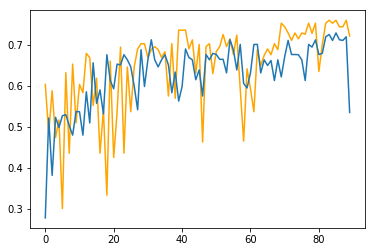

In [104]:
plt.plot(s1['training'][1]['results']['val_mcc_k'],color = 'orange')
plt.plot(s2['training'][1]['results']['val_mcc_k'])

In [116]:
for v,k in s2['feature_config'].items():
    print(v+':'+str(k))

time_steps:400
spectrogram_freq_bins:30
abs_rescale:0
stats_mean:0
stats_std:0
stats_std_top:0
stats_std_bot:0
stats_max_range:0
stats_percentiles:0
stats_relative_percentiles:0
